<a href="https://colab.research.google.com/github/Rafagars/Proyecto-I-FinancierasII/blob/main/ProyectoFinancierasII.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Instalamos y cargamos las librerias necesarias para nuestro analisis

In [1]:
!pip install pyPortfolioOpt
!pip install yfinance

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 220.1/220.1 kB 8.7 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
import yfinance as yf

#Cargamos las libreria Pypfopt que nos ayudara con nuestro analisis financiero
import pypfopt
from pypfopt import risk_models
from pypfopt import plotting
from pypfopt import expected_returns
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import objective_functions

# Definimos el periodo de tiempo de nuestro analisis y las acciones que queremos evaluar

In [3]:
fecha_inicio = dt.datetime(2020, 6, 1)
fecha_final = dt.datetime(2025, 5, 31)

In [4]:
lista_activos = ['MSFT', 'NVDA', 'AAPL', 'AMZN', 'META', 'AVGO', 'GOOGL', 'TSLA', 'BRK-B', 'GOOG'] #Tomamos las 10 acciones mas influyentes del S&P500
portfolio = yf.download(lista_activos, start=fecha_inicio, end=fecha_final) #Descargamos la informacion de los ultimos 5 años

/tmp/ipython-input-4-2253968691.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  portfolio = yf.download(lista_activos, start=fecha_inicio, end=fecha_final) #Descargamos la informacion de los ultimos 5 años
[*********************100%***********************]  10 of 10 completed


In [5]:
portfolio = portfolio['Close'].dropna()
#Antes se usaba Adj Close para los calculos pero al parecer las nuevas versiones de la libreria hacen lo necesario para que baste con Close

In [6]:
portfolio.head()

Ticker,AAPL,AMZN,AVGO,BRK-B,GOOG,GOOGL,META,MSFT,NVDA,TSLA
Date,,,,,,,,,,
2020-06-01,78.215118,123.552002,25.464321,183.839996,71.167969,71.315796,230.644669,175.166824,8.773314,59.873333
2020-06-02,78.577202,123.620499,26.172947,185.940002,71.535782,71.685577,231.450256,177.159607,8.792240,58.770668
2020-06-03,79.009781,123.919998,27.180145,190.820007,71.394623,71.533485,228.904236,177.590775,8.736703,58.863998
2020-06-04,78.329346,123.029999,27.123936,192.050003,70.191780,70.293427,225.055313,175.253021,8.737699,57.625332
2020-06-05,80.560219,124.150002,27.843115,200.660004,71.494530,71.571762,229.510895,179.353638,8.890697,59.043999


In [7]:
portfolio.to_csv('portfolio.csv', index=True) #Convertimos a archivo csv nuestra data descargada
portfolio = pd.read_csv('portfolio.csv', index_col="Date", parse_dates=True) #La cargamos ahora como un dataframe usando pandas

<Axes: xlabel='Date'>

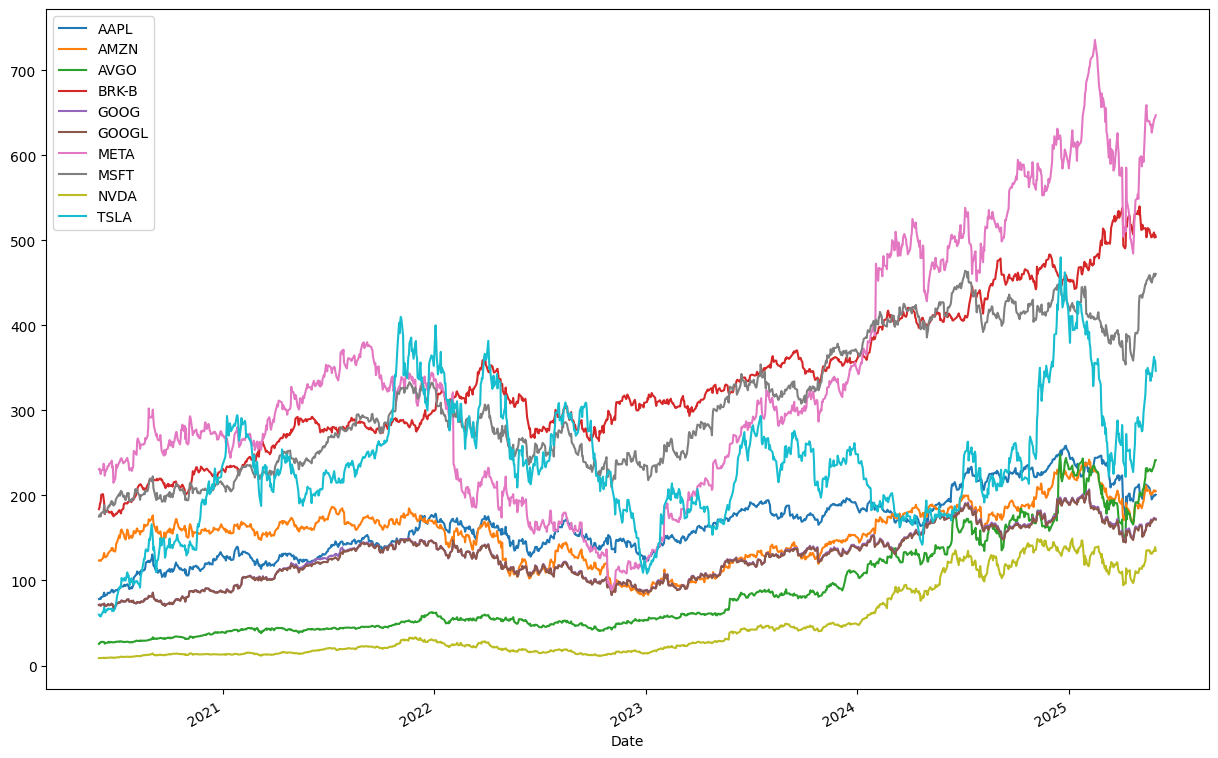

In [8]:
#@title Grafico del desempeño de las acciones en estos ultimos 5 años
portfolio[portfolio.index >= "2020-06-01"].plot(figsize=(15,10)) #Graficamos el comportamiento de las acciones estos ultimos 5 años

# Calculo de los Rendimientos y Matriz de Varianza - Covarianza

In [11]:
#@title Calculamos los rendimientos logaritmicos
rendimientos_log = np.log(portfolio).diff()
rendimientos_log.dropna(inplace=True)
rendimientos_log

,AAPL,AMZN,AVGO,BRK-B,GOOG,GOOGL,META,MSFT,NVDA,TSLA
Date,,,,,,,,,,
2020-06-02,0.004619,0.000554,0.027448,0.011358,0.005155,0.005172,0.003487,0.011312,0.002155,-0.018588
2020-06-03,0.005490,0.002420,0.037760,0.025907,-0.001975,-0.002124,-0.011061,0.002431,-0.006337,0.001587
2020-06-04,-0.008649,-0.007208,-0.002070,0.006425,-0.016991,-0.017487,-0.016958,-0.013251,0.000114,-0.021267
2020-06-05,0.028083,0.009062,0.026169,0.043856,0.018390,0.018022,0.019604,0.023129,0.017359,0.024321
2020-06-08,0.005895,0.016401,0.001387,0.004475,0.005698,0.005554,0.002726,0.006177,-0.012977,0.070045
...,...,...,...,...,...,...,...,...,...,...
2025-05-23,-0.030711,-0.010443,-0.007882,-0.000218,-0.013994,-0.014145,-0.015052,-0.010342,-0.011662,-0.004997
2025-05-27,0.024984,0.024718,0.029849,0.011258,0.025557,0.025956,0.024044,0.023078,0.031563,0.067097
2025-05-28,0.001048,-0.006330,0.015913,-0.011954,-0.003455,-0.003128,0.001960,-0.007255,-0.005105,-0.016644


In [12]:
#@title Rendimiento anual esperado de cada accion
rendimientos_anuales = rendimientos_log.mean() * 252 #El Rendimiento esperado anual se puede ver como la media de los rendimientos por los 252 dias de un año financiero
rendimientos_anuales

,0
AAPL,0.189220
AMZN,0.101602
AVGO,0.451352
BRK-B,0.202329
GOOG,0.177800
GOOGL,0.176090
META,0.206948
MSFT,0.193869
NVDA,0.548632
TSLA,0.352225


<Axes: title={'center': 'Rendimiento anual esperado de los activos'}>

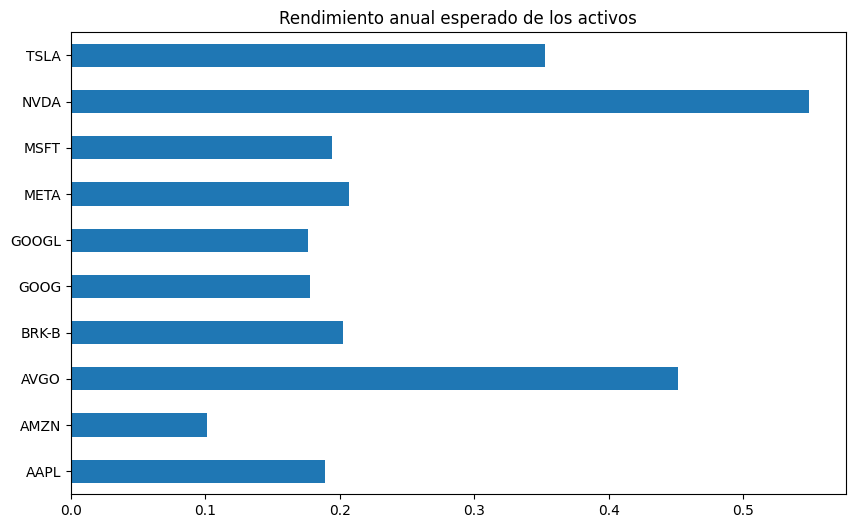

In [13]:
rendimientos_anuales.plot.barh(figsize=(10,6), title='Rendimiento anual esperado de los activos')

In [14]:
#@title Rendimiento anual esperado utilizando la libreria PypfOpt
mu = expected_returns.mean_historical_return(portfolio, frequency=252, log_returns=True, compounding=False) #Calculamos el rendimiento esperado historico para comparar
mu #Coinciden con lo obtenido calculandolo nosotros mismo

,0
AAPL,0.189220
AMZN,0.101602
AVGO,0.451352
BRK-B,0.202329
GOOG,0.177800
GOOGL,0.176090
META,0.206948
MSFT,0.193869
NVDA,0.548632
TSLA,0.352225


In [15]:
# @title Matriz de Varianza - Covarianza
matriz_cov = risk_models.sample_cov(portfolio, frequency=252) #Matriz de Varianza - Covarianza anual
matriz_cov

,AAPL,AMZN,AVGO,BRK-B,GOOG,GOOGL,META,MSFT,NVDA,TSLA
AAPL,0.090338,0.064205,0.061440,0.023186,0.054336,0.054596,0.069884,0.054753,0.086887,0.096796
AMZN,0.064205,0.127774,0.073475,0.021514,0.072166,0.071951,0.098846,0.066984,0.109821,0.106160
AVGO,0.061440,0.073475,0.165581,0.021083,0.059827,0.060484,0.079610,0.060538,0.143146,0.114860
BRK-B,0.023186,0.021514,0.021083,0.033488,0.021751,0.021523,0.024225,0.018636,0.025358,0.028148
GOOG,0.054336,0.072166,0.059827,0.021751,0.096416,0.096180,0.083260,0.058317,0.090474,0.082507
GOOGL,0.054596,0.071951,0.060484,0.021523,0.096180,0.096878,0.083350,0.058600,0.090905,0.082500
META,0.069884,0.098846,0.079610,0.024225,0.083260,0.083350,0.194668,0.071324,0.120262,0.098761
MSFT,0.054753,0.066984,0.060538,0.018636,0.058317,0.058600,0.071324,0.073733,0.093011,0.078320
NVDA,0.086887,0.109821,0.143146,0.025358,0.090474,0.090905,0.120262,0.093011,0.281182,0.162688
TSLA,0.096796,0.106160,0.114860,0.028148,0.082507,0.082500,0.098761,0.078320,0.162688,0.411198


In [16]:
# @title Riesgo anual
riesgo_anual = rendimientos_log.std() * np.sqrt(252) #Riesgo anual que es lo mismo que la desviacion estandar anual
riesgo_anual #Podemos ver que coincide con la raiz de cada una de las varianzas de la matriz

,0
AAPL,0.299609
AMZN,0.357168
AVGO,0.403000
BRK-B,0.182963
GOOG,0.310662
GOOGL,0.311347
META,0.445435
MSFT,0.271241
NVDA,0.526477
TSLA,0.638103


In [17]:
#Se usa "encogimiento" de la covarianza como recomienda la documentacion de PypfOpt para obtener una mejor estimacion de la matriz de covarianza
S = risk_models.CovarianceShrinkage(portfolio).ledoit_wolf()
S

,AAPL,AMZN,AVGO,BRK-B,GOOG,GOOGL,META,MSFT,NVDA,TSLA
AAPL,0.090924,0.063522,0.060787,0.022939,0.053758,0.054015,0.069140,0.054170,0.085963,0.095766
AMZN,0.063522,0.127961,0.072694,0.021286,0.071399,0.071186,0.097795,0.066272,0.108653,0.105031
AVGO,0.060787,0.072694,0.165366,0.020859,0.059190,0.059841,0.078763,0.059894,0.141624,0.113639
BRK-B,0.022939,0.021286,0.020859,0.034678,0.021520,0.021294,0.023967,0.018438,0.025088,0.027849
GOOG,0.053758,0.071399,0.059190,0.021520,0.096936,0.095157,0.082375,0.057697,0.089511,0.081629
GOOGL,0.054015,0.071186,0.059841,0.021294,0.095157,0.097393,0.082464,0.057977,0.089938,0.081622
META,0.069140,0.097795,0.078763,0.023967,0.082375,0.082464,0.194144,0.070565,0.118983,0.097711
MSFT,0.054170,0.066272,0.059894,0.018438,0.057697,0.057977,0.070565,0.074494,0.092022,0.077487
NVDA,0.085963,0.108653,0.141624,0.025088,0.089511,0.089938,0.118983,0.092022,0.279738,0.160957
TSLA,0.095766,0.105031,0.113639,0.027849,0.081629,0.081622,0.097711,0.077487,0.160957,0.408371


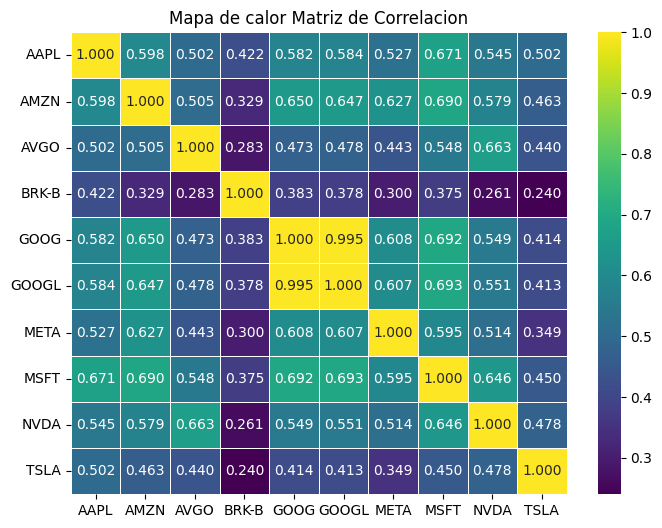

In [18]:
# @title Mapa de Calor de Matriz de Correlaccion
plt.figure(figsize=(8, 6))
sns.heatmap(
  risk_models.cov_to_corr(matriz_cov),
  annot=True, #Muestra los valores de la correlacion
  cmap='viridis',
  fmt=".3f",        # Format the annotation values
  linewidths=.5
)
plt.title('Mapa de calor Matriz de Correlacion')
plt.show()

# Frontera Eficiente de Markowitz

## Sin permitir ventar en corto (wᵢ ≥ 0)

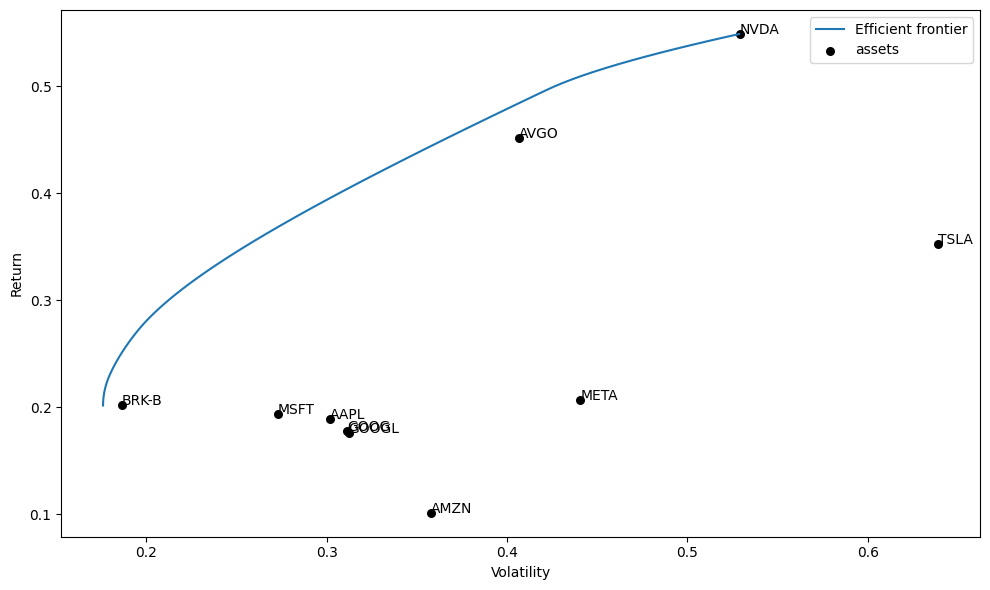

In [19]:
# @title Grafico de Frontera Eficiente sin ventas en corto
ef = EfficientFrontier(mu, S, weight_bounds=(0, 1))

fig, ax = plt.subplots(figsize= (10,6))
plotting.plot_efficient_frontier(ef, ax=ax, show_assets=True, show_tickers=True)
plt.show()

### Pesos para el minimo riesgo

In [30]:
ef = EfficientFrontier(mu, S, weight_bounds=(0, 1))
weights = ef.min_volatility()

cleaned_weights = ef.clean_weights()
print(dict(cleaned_weights))

{'AAPL': 0.01477, 'AMZN': 0.0, 'AVGO': 0.00758, 'BRK-B': 0.76185, 'GOOG': 0.0, 'GOOGL': 0.02487, 'META': 0.0, 'MSFT': 0.19093, 'NVDA': 0.0, 'TSLA': 0.0}


<Axes: xlabel='Weight'>

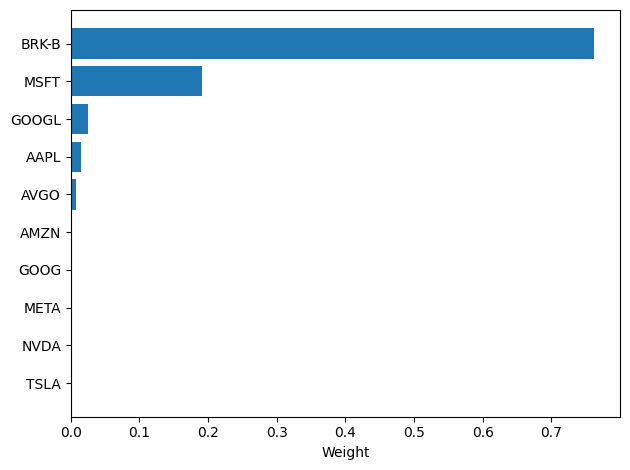

In [31]:
#@title Grafico de barras de los pesos para el minimo riesgo
plotting.plot_weights(cleaned_weights)

In [32]:
#@title Evaluacion del Portafolio con el minimo riesgo
ef.portfolio_performance(verbose=True)

Expected annual return: 20.2%
Annual volatility: 17.6%
Sharpe Ratio: 1.15


(np.float64(0.20175472031689065),
 np.float64(0.17597271071490903),
 np.float64(1.1465114079179624))

### Pesos para el punto con el Maximo Sharpe

In [60]:
ef2 = EfficientFrontier(mu, S, weight_bounds=(0, 1))
weights2 = ef2.max_sharpe(risk_free_rate=0.044) #Nuestro activo libre de riesgo tiene una tasa de 4.4%

cleaned_weights2 = ef2.clean_weights()
print(dict(cleaned_weights2))

{'AAPL': 0.0, 'AMZN': 0.0, 'AVGO': 0.25254, 'BRK-B': 0.59008, 'GOOG': 0.0, 'GOOGL': 0.0, 'META': 0.0, 'MSFT': 0.0, 'NVDA': 0.15738, 'TSLA': 0.0}


<Axes: xlabel='Weight'>

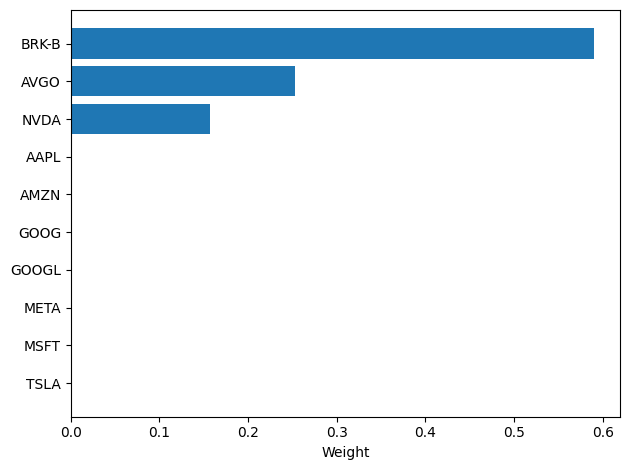

In [61]:
# @title Grafico de barra de los pesos para el MSRP
plotting.plot_weights(cleaned_weights2)

In [62]:
#@title Evaluacion del Portafolio con el Maximo Sharpe
ef2.portfolio_performance(verbose=True, risk_free_rate=0.044)

Expected annual return: 32.0%
Annual volatility: 22.7%
Sharpe Ratio: 1.21


(np.float64(0.31971741507279566),
 np.float64(0.22734003063373914),
 np.float64(1.2127974747966668))

### Calculos para la Simulacion Monte Carlo

In [63]:
n_samples = 10000
w = np.random.dirichlet(np.ones(len(mu)), n_samples)
rets = w.dot(mu)
stds = np.sqrt((w.T * (S @ w.T)).sum(axis=0))
sharpes = rets / stds

print("Rendimientos del Portafolio de muestra:", rets)
print("Riesgos del Portafolio de Muestra: \n", stds)

Rendimientos del Portafolio de muestra: [0.21349004 0.22177136 0.29838191 ... 0.2156846  0.25150149 0.26005172]
Riesgos del Portafolio de Muestra: 
 0       0.263684
1       0.287048
2       0.306476
3       0.275946
4       0.290292
          ...   
9995    0.276680
9996    0.255569
9997    0.274962
9998    0.274946
9999    0.296653
Length: 10000, dtype: float64


/usr/local/lib/python3.11/dist-packages/pypfopt/efficient_frontier/efficient_frontier.py:441: UserWarning: The risk_free_rate provided to portfolio_performance is different to the one used by max_sharpe. Using the previous value.
  warnings.warn(


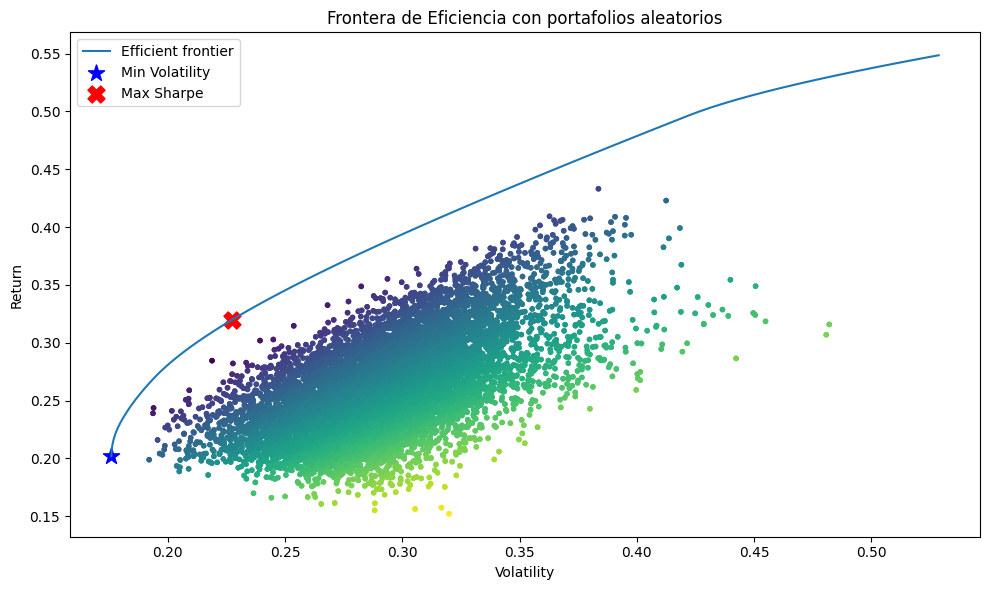

In [44]:
# Graficamos la Frontera de Eficiencia usando simulacion de Monte Carlo
ef = EfficientFrontier(mu, S, weight_bounds=(0, 1))

fig, ax = plt.subplots(figsize= (10,6))
plotting.plot_efficient_frontier(ef, ax=ax, show_assets=False)

# Buscamos y graficamos la Minima Varianza
ef2 = EfficientFrontier(mu, S, weight_bounds=(0, 1))
ef2.min_volatility()
ret_tangent, std_tangent, _ = ef2.portfolio_performance()

# Graficamos los Portafolios aleatorios
ax.scatter(stds, rets, marker=".", c=sharpes, cmap="viridis_r")
ax.scatter(std_tangent, ret_tangent, c='blue', marker='*',s=150, label= 'Min Volatility')

# Buscamos y graficamos el punto Tangente
ef3 = EfficientFrontier(mu, S, weight_bounds=(0, 1))
ef3.max_sharpe(risk_free_rate=0.044)
ret_tangent, std_tangent, _ = ef3.portfolio_performance()

# Graficamos los Portafolios aleatorios
ax.scatter(stds, rets, marker=".", c=sharpes, cmap="viridis_r")
ax.scatter(std_tangent, ret_tangent, c='red', marker='X',s=150, label= 'Max Sharpe')

# Formato
ax.set_title("Frontera de Eficiencia con portafolios aleatorios")
ax.legend()
plt.tight_layout()
plt.show()

## Permitiendo ventas en corto

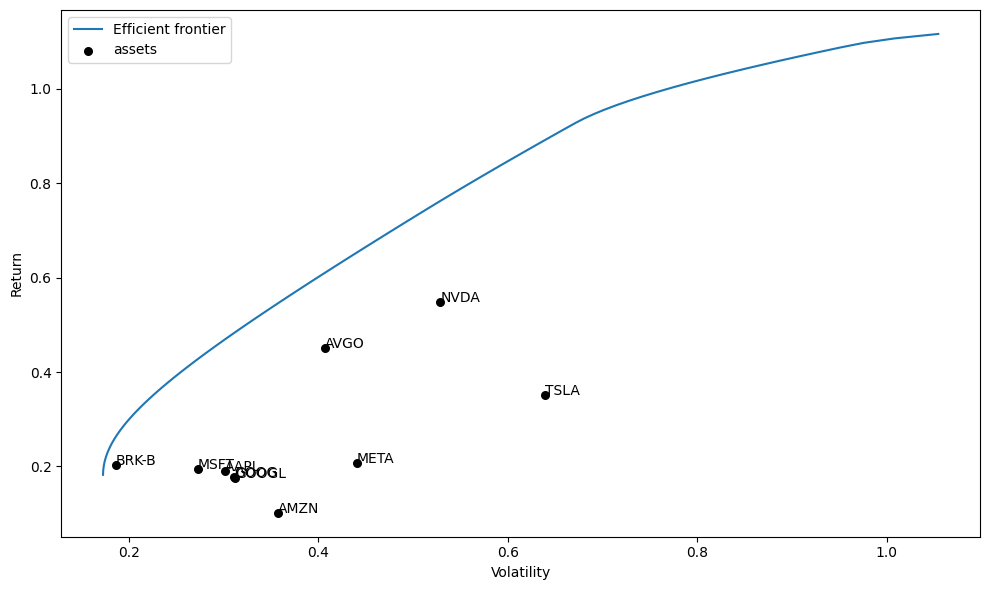

In [20]:
# @title Grafico de Frontera Eficiente con ventas en corto
ef = EfficientFrontier(mu, S, weight_bounds=(-1, 1))

fig, ax = plt.subplots(figsize= (10,6))
plotting.plot_efficient_frontier(ef, ax=ax, show_assets=True, show_tickers=True)
plt.show()

### Pesos para el minimo riesgo

In [45]:
ef = EfficientFrontier(mu, S, )
weights = ef.min_volatility()

cleaned_weights = ef.clean_weights()
print(dict(cleaned_weights))

{'AAPL': 0.04631, 'AMZN': 0.01307, 'AVGO': 0.05676, 'BRK-B': 0.72522, 'GOOG': 0.00895, 'GOOGL': 0.04523, 'META': -0.03333, 'MSFT': 0.2357, 'NVDA': -0.07255, 'TSLA': -0.02536}


<Axes: xlabel='Weight'>

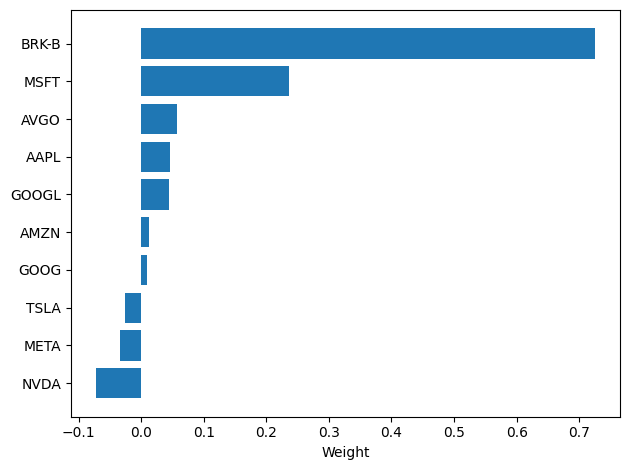

In [46]:
plotting.plot_weights(cleaned_weights)

In [47]:
#@title Evaluacion del Portafolio con el minimo riesgo
ef.portfolio_performance(verbose=True)

Expected annual return: 18.2%
Annual volatility: 17.3%
Sharpe Ratio: 1.05


(np.float64(0.18206017112017958),
 np.float64(0.1727717777623838),
 np.float64(1.0537610568004356))

### Pesos para MSRP



In [55]:
ef2 = EfficientFrontier(mu, S, weight_bounds=(-1, 1))
weights2 = ef2.max_sharpe(risk_free_rate=0.044) #Nuestro activo libre de riesgo tiene una tasa de 4.4%

cleaned_weights2 = ef2.clean_weights()
print(dict(cleaned_weights2))

{'AAPL': -0.12085, 'AMZN': -0.5126, 'AVGO': 0.38605, 'BRK-B': 0.89294, 'GOOG': 0.13076, 'GOOGL': -0.18913, 'META': 0.00436, 'MSFT': 0.04587, 'NVDA': 0.33943, 'TSLA': 0.02318}


<Axes: xlabel='Weight'>

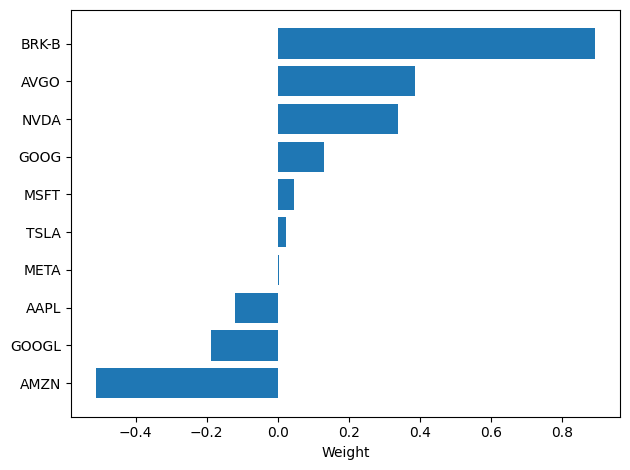

In [56]:
#@title Grafico de barras pesos MSRP
plotting.plot_weights(cleaned_weights2)

In [58]:
# @title Evaluacion del Portafolio MSRP
ef2.portfolio_performance(verbose=True, risk_free_rate=0.044)

Expected annual return: 47.4%
Annual volatility: 30.5%
Sharpe Ratio: 1.41


(np.float64(0.47408740355531004),
 np.float64(0.30494180026186674),
 np.float64(1.4103917638906027))

### Calculos para la Simulacion Monte Carlo

In [48]:
n_samples = 10000
w = np.random.dirichlet(np.ones(len(mu)), n_samples)
rets = w.dot(mu)
stds = np.sqrt((w.T * (S @ w.T)).sum(axis=0))
sharpes = rets / stds

print("Sample portfolio returns:", rets)
print("Sample portfolio volatilities: \n", stds)

Sample portfolio returns: [0.25426245 0.25130078 0.31254233 ... 0.22006947 0.22697028 0.33122611]
Sample portfolio volatilities: 
 0       0.270951
1       0.332784
2       0.318873
3       0.300666
4       0.282810
          ...   
9995    0.287721
9996    0.325734
9997    0.311727
9998    0.281740
9999    0.315843
Length: 10000, dtype: float64


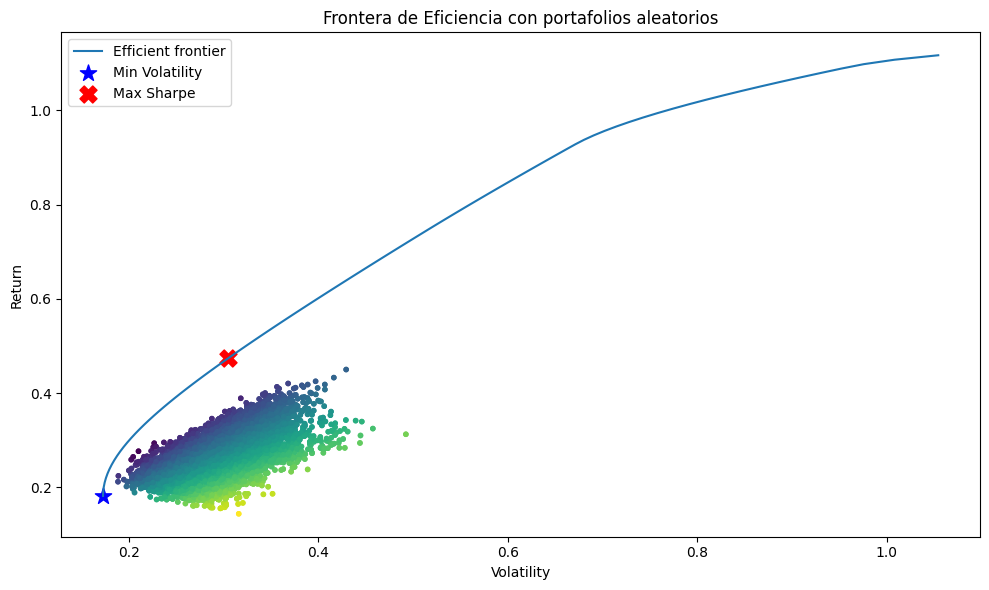

In [50]:
# Graficamos la Frontera de Eficiencia usando simulacion de Monte Carlo
ef = EfficientFrontier(mu, S, weight_bounds=(-1, 1))

fig, ax = plt.subplots(figsize= (10,6))
plotting.plot_efficient_frontier(ef, ax=ax, show_assets=False)

# Buscamos y graficamos la Minima Varianza
ef2 = EfficientFrontier(mu, S, weight_bounds=(-1, 1))
ef2.min_volatility()
ret_tangent, std_tangent, _ = ef2.portfolio_performance()

# Graficamos los Portafolio aleatorios
ax.scatter(stds, rets, marker=".", c=sharpes, cmap="viridis_r")
ax.scatter(std_tangent, ret_tangent, c='blue', marker='*',s=150, label= 'Min Volatility')


# Buscamos y graficamos el punto Tangente
ef3 = EfficientFrontier(mu, S, weight_bounds=(-1, 1))
ef3.max_sharpe(risk_free_rate=0.044)
ret_tangent, std_tangent, _ = ef3.portfolio_performance()

# Graficamos los Portafolios aleatorios
ax.scatter(stds, rets, marker=".", c=sharpes, cmap="viridis_r")
ax.scatter(std_tangent, ret_tangent, c='red', marker='X',s=150, label= 'Max Sharpe')

# Formato
ax.set_title("Frontera de Eficiencia con portafolios aleatorios")
ax.legend()
plt.tight_layout()
plt.show()

# Definimos el valor de nuestro activo libre de riesgo y calculamos el valor esperado y varianza del Mercado

In [37]:
#@title Activo libre de riesgo. Tomamos los bonos del Tesoro de E.E.U.U
rf = 0.044

In [36]:
#@title Descargamos la informacion del indice S&P500
precios_mercado = yf.download("^GSPC", start=fecha_inicio, end=fecha_final)
precios_mercado = precios_mercado['Close'] #Asi tenemos los precios del mercado para calcular su rendimiento esperado

/tmp/ipython-input-36-730189388.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  precios_mercado = yf.download("^GSPC", start=fecha_inicio, end=fecha_final)
[*********************100%***********************]  1 of 1 completed


In [39]:
# @title Rendimientos Logaritmicos del Mercado
rendimientos_log_mercado = np.log(precios_mercado).diff()
rendimientos_log_mercado.dropna(inplace=True)
rendimientos_log_mercado

Ticker,^GSPC
Date,
2020-06-02,0.008177
2020-06-03,0.013557
2020-06-04,-0.003374
2020-06-05,0.025874
2020-06-08,0.011970
...,...
2025-05-23,-0.006731
2025-05-27,0.020253
2025-05-28,-0.005587


In [40]:
#@title Rendimiento anual esperado del mercado
r_M = expected_returns.mean_historical_return(precios_mercado, log_returns=True, compounding=False)
r_M

,0
Ticker,
^GSPC,0.132403


In [ ]:
#@title Varianza anual del mercado
var_M = rendimientos_log_mercado.var() * 252
var_M

,0
Ticker,
^GSPC,0.031655


In [ ]:
# @title Desviacion estandar anual del mercado
sd_M = rendimientos_log_mercado.std() * np.sqrt(252)
sd_M

,0
Ticker,
^GSPC,0.177919


In [ ]:
# @title Calculamos la pendiente del CML que es lo mismo que el ratio de Sharpe
sharpe_ratio = (r_M - rf) / sd_M
sharpe_ratio

,0
Ticker,
^GSPC,0.496871


In [ ]:
mu_CML = rf + sharpe_ratio * sd_Pf #Calculamos el rendimiento esperado del CML (Revisar esto)
mu_CML

,0
Ticker,
^GSPC,0.130456


## Calculos del CAPM y SML

In [ ]:
# @title Rendimientos Esperados segun el CAPM
mu_capm = expected_returns.capm_return(portfolio, risk_free_rate = rf, market_prices=precios_mercado, log_returns=True, compounding=False)
mu_capm

,mkt
AAPL,0.156378
AMZN,0.170559
AVGO,0.179824
BRK-B,0.106122
GOOG,0.153797
GOOGL,0.153963
META,0.182659
MSFT,0.148098
NVDA,0.226484
TSLA,0.221031


<Axes: title={'center': 'Rendimineto anual esperado por CAPM de los activos'}>

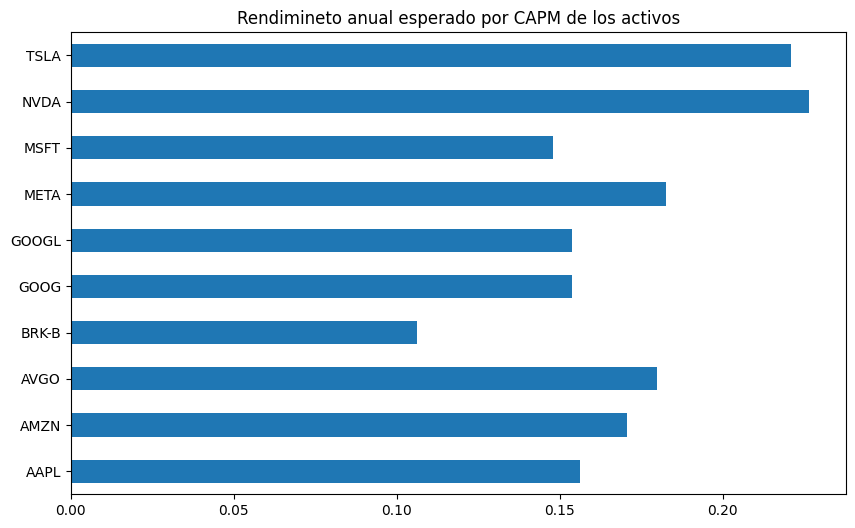

In [ ]:
mu_capm.plot.barh(figsize=(10,6), title="Rendimineto anual esperado por CAPM de los activos")

In [ ]:
# @title Calculamos los Betas de cada accion
betas = (mu_capm - rf)/(r_M['^GSPC'] - rf) #Para estimar los betas calculados por pyportfolio
betas

,mkt
AAPL,1.271196
AMZN,1.431613
AVGO,1.536423
BRK-B,0.702718
GOOG,1.242004
GOOGL,1.243884
META,1.568493
MSFT,1.177537
NVDA,2.064227
TSLA,2.002545


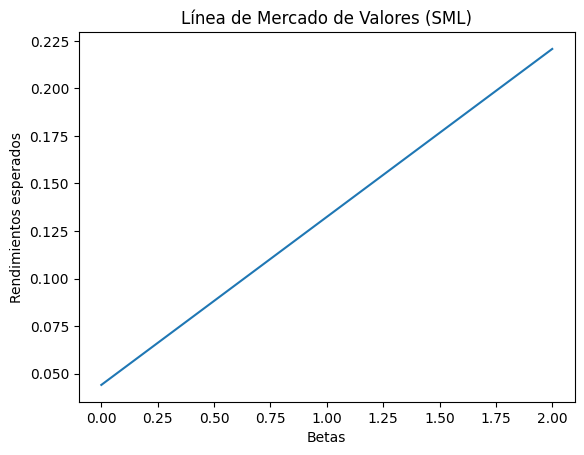

In [ ]:
# @title Grafica de la Linea de Mercado de Valores (SML)
x = [0, 1, 2]
y = [rf, r_M['^GSPC'], rf + 2*(r_M['^GSPC'] - rf)]
plt.plot(x, y)
plt.xlabel('Betas')
plt.ylabel('Rendimientos esperados')
plt.title('Línea de Mercado de Valores (SML)')
plt.show()

In [ ]:
# @title Calculamos los Alfas de Jensen calculando la diferencia entre los rendimientos esperados obtenidos al inicio y los rendimientos del CAPM
alpha = mu - mu_capm
alpha

,0
AAPL,0.032842
AMZN,-0.068957
AVGO,0.271528
BRK-B,0.096206
GOOG,0.024004
GOOGL,0.022127
META,0.024289
MSFT,0.045772
NVDA,0.322149
TSLA,0.131194
